In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load
df = pd.read_csv("data/sales_data.csv")
df.head()

,Date,Category,Sales
0,2024-01-01,Electronics,12000
1,2024-01-05,Clothing,8000
2,2024-01-10,Grocery,6000
3,2024-02-03,Electronics,15000
4,2024-02-08,Clothing,9000


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      9 non-null      datetime64[ns]
 1   Category  9 non-null      object        
 2   Sales     9 non-null      int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 348.0+ bytes


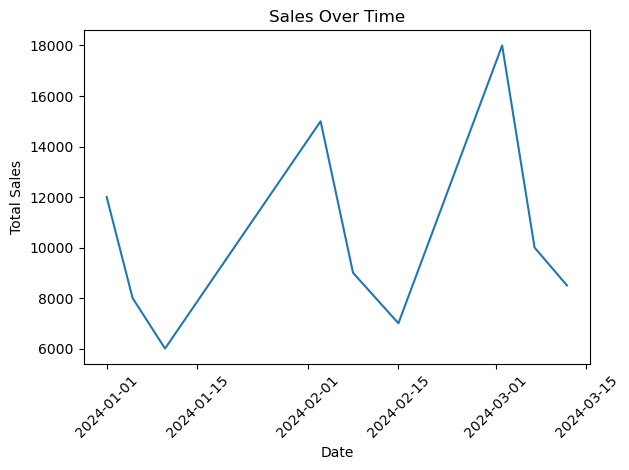

In [6]:
# Plot Sales Over Time (Line Chart)
daily_sales = df.groupby('Date')['Sales'].sum().reset_index()

plt.figure()
plt.plot(daily_sales['Date'], daily_sales['Sales'])
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("charts/sales_over_time.png")
plt.show()

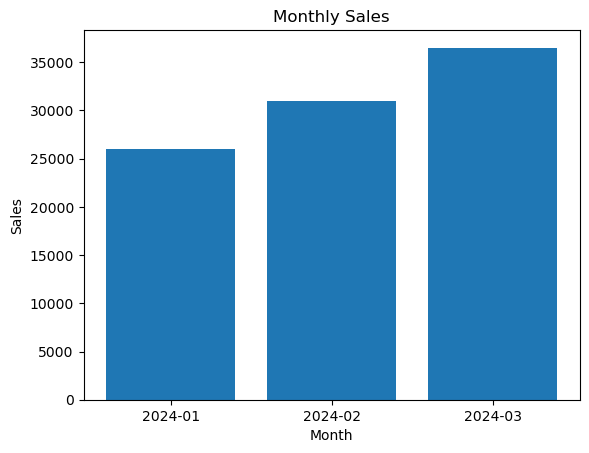

In [7]:
# Monthly Aggregation
df['Month'] = df['Date'].dt.to_period('M')

monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

plt.figure()
plt.bar(monthly_sales['Month'], monthly_sales['Sales'])
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.savefig("charts/monthly_sales.png")
plt.show()

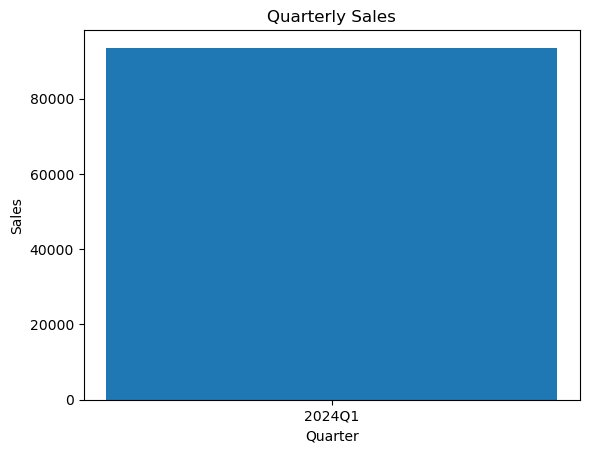

In [8]:
# Quarterly Aggregation
df['Quarter'] = df['Date'].dt.to_period('Q')

quarterly_sales = df.groupby('Quarter')['Sales'].sum().reset_index()
quarterly_sales['Quarter'] = quarterly_sales['Quarter'].astype(str)

plt.figure()
plt.bar(quarterly_sales['Quarter'], quarterly_sales['Sales'])
plt.title("Quarterly Sales")
plt.xlabel("Quarter")
plt.ylabel("Sales")
plt.savefig("charts/quarterly_sales.png")
plt.show()

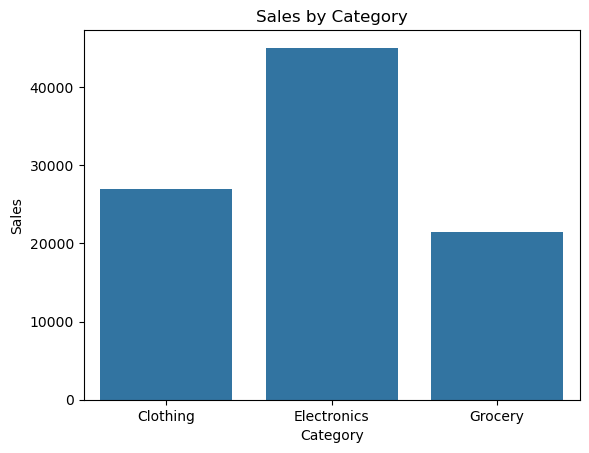

In [9]:
# Category Comparison (Bar Chart)
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

plt.figure()
sns.barplot(data=category_sales, x='Category', y='Sales')
plt.title("Sales by Category")
plt.savefig("charts/category_sales.png")
plt.show()

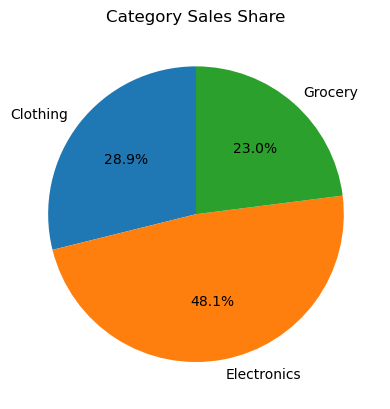

In [ ]:
# Category Share (Pie Chart)
plt.figure()
plt.pie(category_sales['Sales'],
        labels=category_sales['Category'],
        autopct='%1.1f%%',
        startangle=90)
plt.title("Category Sales Share")
plt.savefig("charts/category_share.png")
plt.show()

## Chart Selection & Formatting Explanation

- Line charts are used for time series data as they clearly show trends over time.
- Bar charts are used for monthly, quarterly, and category comparisons because
  they allow easy visual comparison between values.
- Pie charts are used to represent category share as percentages of total sales.

### Formatting Choices
- Titles clearly describe each chart.
- Axis labels improve readability.
- Rotated date labels prevent overlap.
- PNG format is used for portability and reporting.